In [ ]:
# Importamos las bibliotecas necesarias
import pandas as pd  # Para manipulación de datos
import numpy as np   # Para cálculos numéricos
import seaborn as sns  # Para visualizaciones
import matplotlib.pyplot as plt  # Para personalizar gráficos
import plotly.express as px  # Para gráficos interactivos

In [8]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [10]:
# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')  # Usa el estilo con el sufijo correcto
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Formato de decimales

In [11]:
# Cargamos el dataset
df = pd.read_csv('enhanced_saas_marketing_data.csv')

# Convertimos la columna de fecha a datetime
df['date'] = pd.to_datetime(df['date'])

# Exploración inicial
def explorar_datos(df):
    """
    Función para realizar una exploración inicial del dataset

    Parámetros:
    df: DataFrame de pandas con los datos

    Retorna:
    Dict con información básica del dataset
    """
    resumen = {
        'shape': df.shape,  # Dimensiones del dataset
        'missing_values': df.isnull().sum(),  # Valores faltantes
        'dtypes': df.dtypes,  # Tipos de datos
        'descripcion': df.describe()  # Estadísticas básicas
    }
    return resumen

# Ejecutamos la exploración
resumen_inicial = explorar_datos(df)

# Imprimimos los resultados de forma ordenada
print("📊 Dimensiones del Dataset:")
print(f"Filas: {resumen_inicial['shape'][0]}")
print(f"Columnas: {resumen_inicial['shape'][1]}\\n")

print("🔍 Tipos de Datos:")
print(resumen_inicial['dtypes'])


📊 Dimensiones del Dataset:
Filas: 1152
Columnas: 38\n
🔍 Tipos de Datos:
date                         datetime64[ns]
company                              object
region                               object
product_category                     object
organic_traffic                       int64
direct_traffic                        int64
referral_traffic                      int64
paid_traffic                          int64
bounce_rate                         float64
avg_session_duration                float64
pages_per_session                   float64
conversion_rate                     float64
email_sends                           int64
email_opens                           int64
email_clicks                          int64
social_posts                          int64
social_engagement                     int64
leads_generated                       int64
qualified_leads                       int64
opportunities                         int64
closed_deals                          int64
reve

In [12]:
def limpiar_datos(df):
    """
    Función para limpiar y preparar los datos para el análisis

    Parámetros:
    df: DataFrame original

    Retorna:
    DataFrame limpio y preparado
    """
    # Creamos una copia para no modificar los datos originales
    df_clean = df.copy()

    # 1. Manejo de valores faltantes
    df_clean = df_clean.fillna({
        'revenue': df_clean['revenue'].mean(),
        'costs': df_clean['costs'].mean(),
        'customer_satisfaction': df_clean['customer_satisfaction'].median()
    })

    # 2. Creación de métricas derivadas
    df_clean['gross_margin'] = (df_clean['revenue'] - df_clean['costs']) / df_clean['revenue']
    df_clean['marketing_efficiency'] = df_clean['revenue'] / df_clean['marketing_spend']
    df_clean['clv_cac_ratio'] = df_clean['customer_lifetime_value'] / df_clean['customer_acquisition_cost']

    # 3. Agregamos métricas temporales
    df_clean['year_month'] = df_clean['date'].dt.to_period('M')
    df_clean['quarter'] = df_clean['date'].dt.quarter
    df_clean['year'] = df_clean['date'].dt.year

    return df_clean

# Aplicamos la limpieza
df_limpio = limpiar_datos(df)


c:\Users\usuario\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


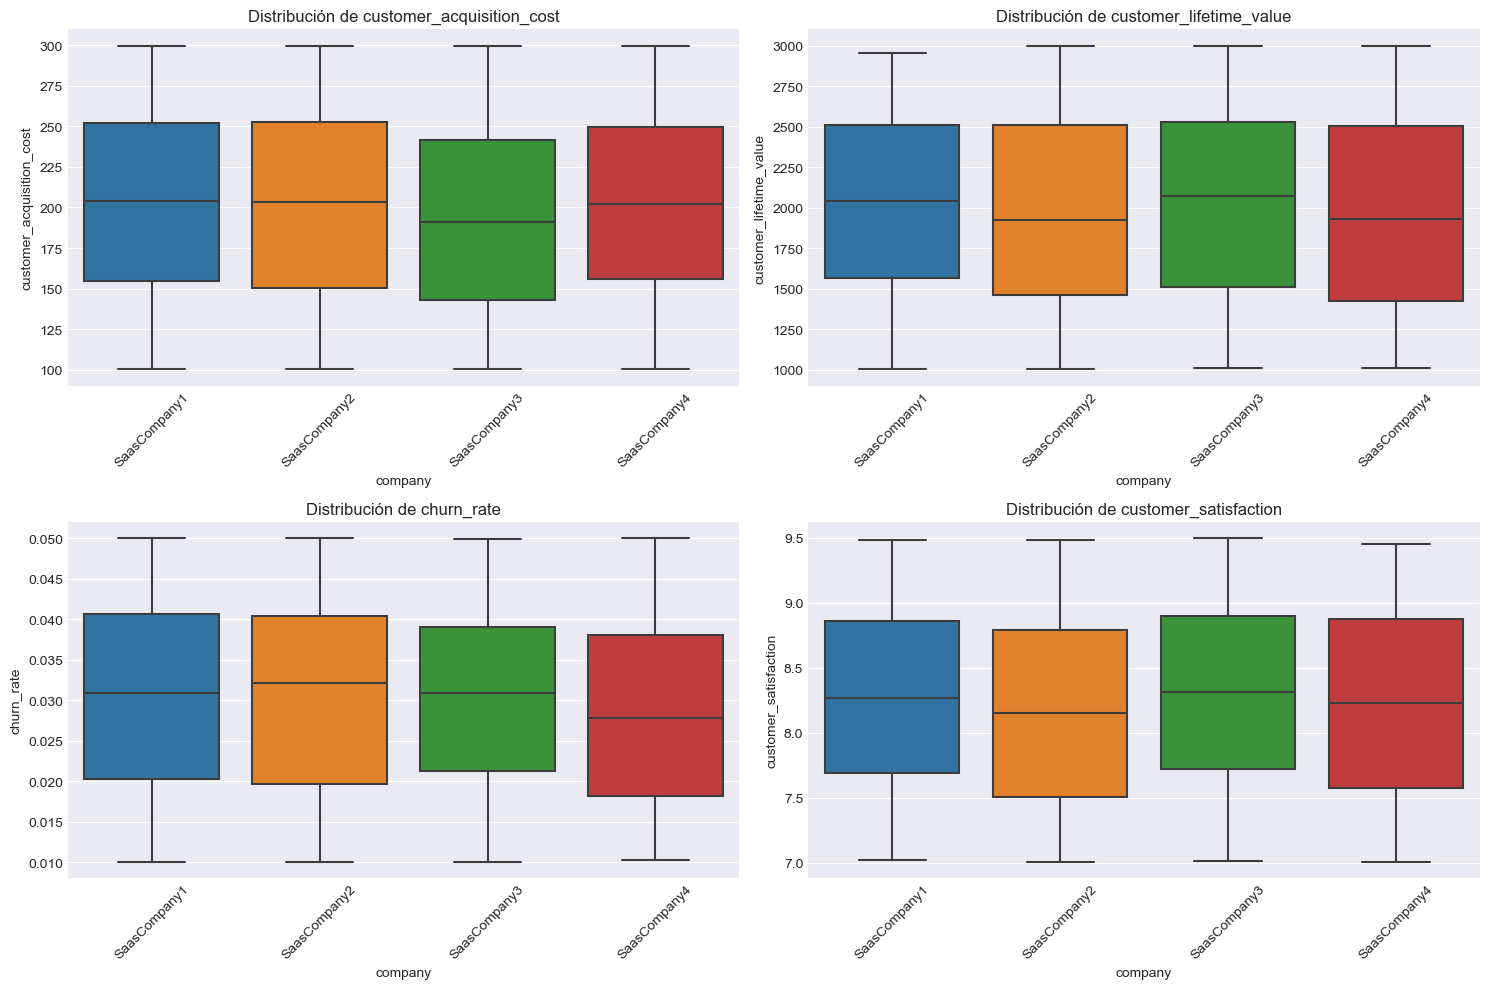

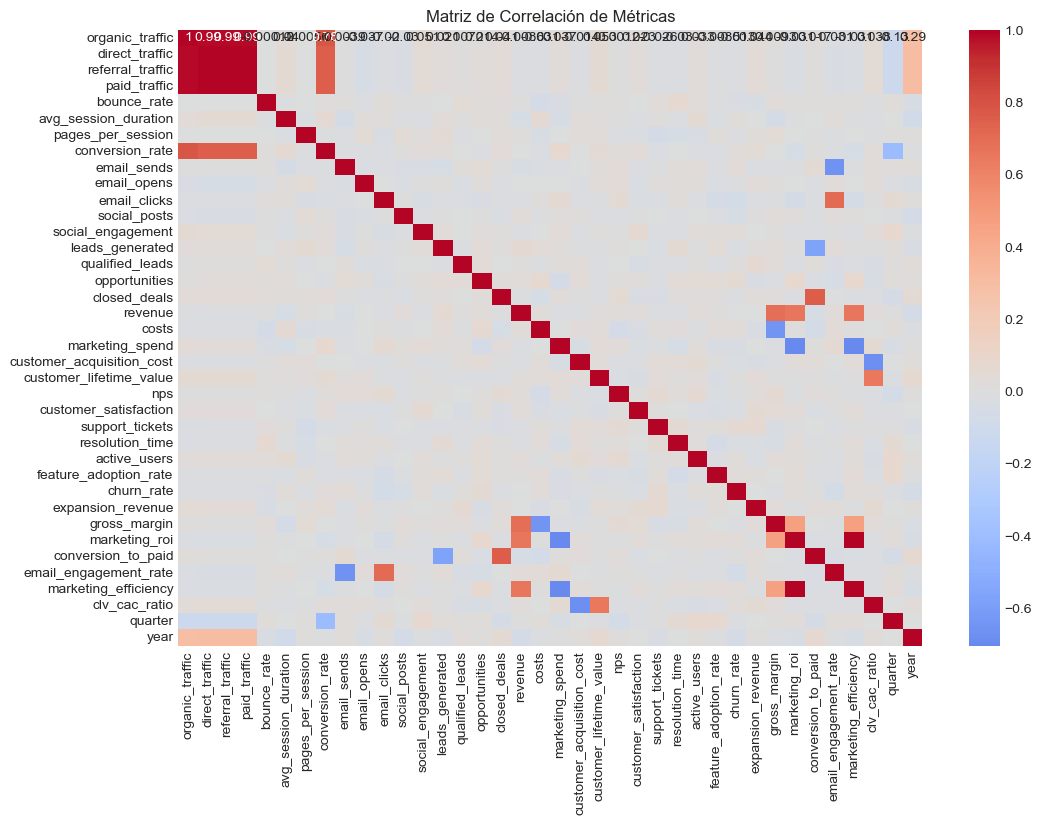

In [13]:
def crear_visualizaciones_iniciales(df):
    """
    Función para crear visualizaciones exploratorias básicas

    Parámetros:
    df: DataFrame limpio
    """
    # 1. Tendencia de Ingresos por Empresa
    fig_revenue = px.line(df,
                         x='date',
                         y='revenue',
                         color='company',
                         title='Tendencia de Ingresos por Empresa')
    fig_revenue.show()

    # 2. Distribución de Métricas Clave
    metricas_clave = ['customer_acquisition_cost',
                      'customer_lifetime_value',
                      'churn_rate',
                      'customer_satisfaction']

    fig = plt.figure(figsize=(15, 10))
    for i, metrica in enumerate(metricas_clave, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(data=df, x='company', y=metrica)
        plt.xticks(rotation=45)
        plt.title(f'Distribución de {metrica}')
    plt.tight_layout()
    plt.show()

    # 3. Matriz de Correlación
    corr_matrix = df.select_dtypes(include=[np.number]).corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación de Métricas')
    plt.show()

# Creamos las visualizaciones
crear_visualizaciones_iniciales(df_limpio)
